In [1]:
!conda activate deeplearning

In [2]:
import scipy.io
import pandas as pd

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [5]:
#import soundfile as sf
#import librosa

import pywt

In [6]:
# load numpy array from csv file
from numpy import loadtxt
from numpy import load
# load array 
data_load_audio_data = loadtxt('data_audio_data3.csv', delimiter=',')
data_load_labels = loadtxt('data_labels3.csv', delimiter=',')
#features = loadtxt('data_features_1000x1000.csv')
coef_all = load('data_coeff_512.npy')

In [7]:
audio_data = np.empty((0, 1024))
labels = np.empty((0, ))
for j in range(data_load_audio_data.shape[0]):
    for i in range(data_load_audio_data.shape[1] // 1024):
        k = i*1024
        audio_data = np.append(audio_data, [data_load_audio_data[j][k:k+1024]], axis = 0)
        labels = np.append(labels, [data_load_labels[j]], axis = 0)
        

In [8]:
from scipy import signal

data_filt = np.empty((0, 1024 ))
Wn = [10, 1500]
t = np.arange(0., 1024/25600, 1/25600)
b, a = signal.butter(2, Wn, 'bandpass', fs=25600, output='ba')

for n in range(len(audio_data)):
    data_filt = np.append(data_filt, [signal.filtfilt(b, a, audio_data[n])], axis = 0)

In [9]:
audio_data = data_filt

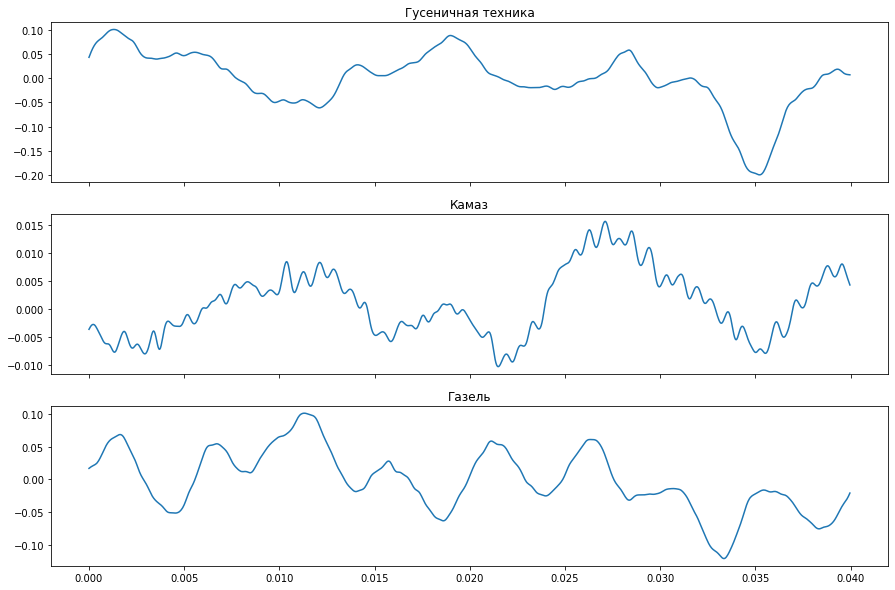

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(15,10))
ax1.plot(t, audio_data[2])
ax1.set_title('Гусеничная техника')

ax2.plot(t, audio_data[240])
ax2.set_title('Камаз')

ax3.plot(t, audio_data[400])
ax3.set_title('Газель')

plt.show()

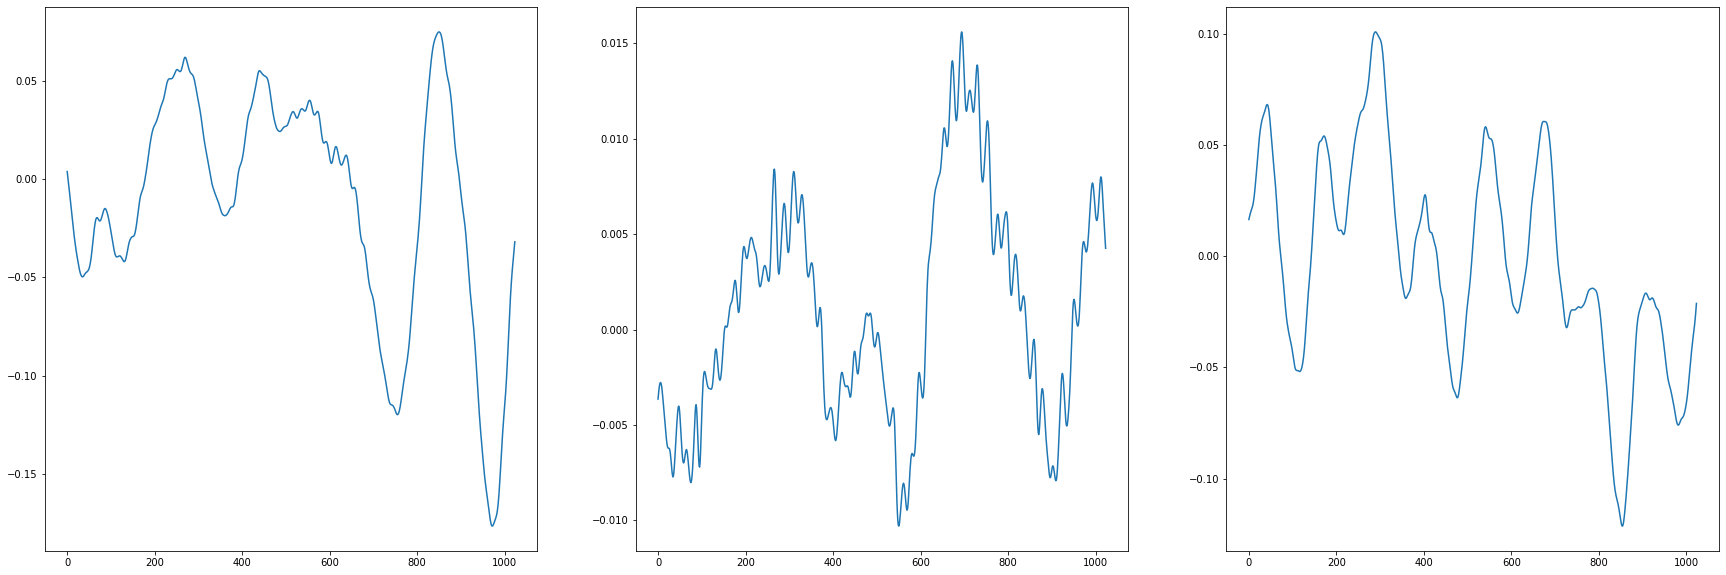

In [11]:
plt.figure(1, figsize=(30,10))
plt.subplot(131)
plt.plot(audio_data[1])
plt.subplot(132)
plt.plot(audio_data[240])
plt.subplot(133)
plt.plot(audio_data[400])

plt.show()

In [12]:
scales = np.arange(1, 512+1, 1)
coeff1, freqs1 = pywt.cwt(audio_data[1], scales, 'morl')
coeff2, freqs2 = pywt.cwt(audio_data[240], scales, 'morl')
coeff3, freqs3 = pywt.cwt(audio_data[400], scales, 'morl')

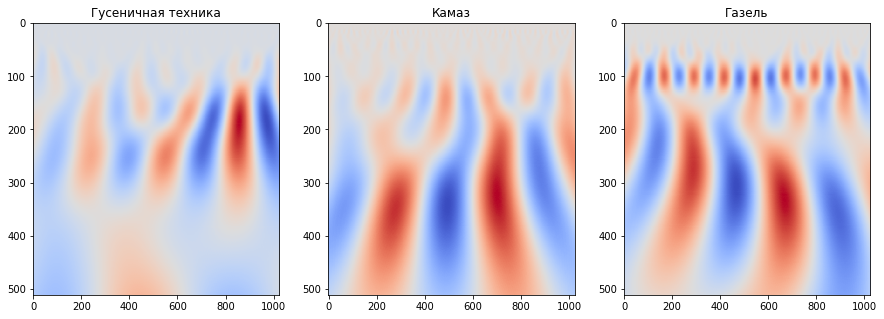

In [13]:
plt.figure(1, figsize=(15,5))
plt.subplot(131)
plt.title('Гусеничная техника')
plt.imshow(coeff1, cmap='coolwarm', aspect='auto')  
plt.subplot(132)
plt.title('Камаз')
plt.imshow(coeff2, cmap='coolwarm', aspect='auto')  
plt.subplot(133)
plt.title('Газель')
plt.imshow(coeff3, cmap='coolwarm', aspect='auto') 

plt.show() 

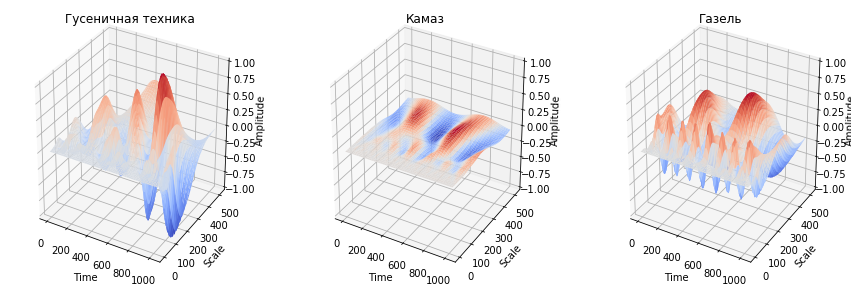

In [14]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(1, 3, 1, projection='3d')

Y = np.arange(1, 513, 1)
X = np.arange(1, 1025, 1)

X, Y = np.meshgrid(X, Y)

ax1.plot_surface(X, Y, coeff1, cmap=cm.coolwarm, linewidth=0, antialiased=True)

ax1.set_title('Гусеничная техника')
ax1.set_xlabel("Time")
ax1.set_ylabel("Scale")
ax1.set_zlabel("Amplitude")
ax1.set_zlim3d(-1,1)

ax2 = fig.add_subplot(1, 3, 2, projection='3d')

ax2.plot_surface(X, Y, coeff2, cmap=cm.coolwarm, linewidth=0, antialiased=True)
ax2.set_title('Камаз')
ax2.set_xlabel("Time")
ax2.set_ylabel("Scale")
ax2.set_zlabel("Amplitude")
ax2.set_zlim3d(-1,1)

ax3= fig.add_subplot(1, 3, 3, projection='3d')

ax3.plot_surface(X, Y, coeff3, cmap=cm.coolwarm, linewidth=0, antialiased=True)
ax3.set_title('Газель')
ax3.set_xlabel("Time")
ax3.set_ylabel("Scale")
ax3.set_zlabel("Amplitude")
ax3.set_zlim3d(-1,1)

plt.show()

In [47]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)

features = np.empty((0,512))

for ind in range(len(audio_data)):
    print('.', end='')
    coeff, freqs = pywt.cwt(audio_data[ind][:1024], scales, 'morl')  
    #coeff = coef_all[ind]
    features = np.vstack([features, pca.fit_transform(coeff).flatten()])

..................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [85]:
features.shape

(450, 512)

In [48]:
#coef_all = load('data_coeff_512.npy')
features

In [64]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=19)

In [65]:
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [66]:
y_pred = clf.predict(X_test)
print("Accuracy : %.2f%%" % (accuracy_score(y_test, y_pred) * 100))

Accuracy : 89.38%


In [16]:
y_train

array([1., 2., 2., 2., 1., 3., 3., 2., 1., 3., 1., 3., 2., 1., 1., 2., 2.,
       2., 1., 3., 2., 3., 3., 2., 3., 1., 2., 2., 2., 2., 1., 3., 2., 2.,
       1., 1., 2., 3., 1., 1., 3., 3., 1., 3., 1., 2., 2., 1., 3., 1., 3.,
       2., 1., 2., 3., 2., 1., 2., 2., 3., 2., 2., 2., 2., 1., 2., 3., 1.,
       1., 2., 3., 3., 1., 2., 3., 2., 2., 3., 3., 2., 1., 3., 2., 2., 2.,
       2., 2., 2., 2., 3., 1., 2., 2., 2., 3., 1., 3., 3., 2., 2., 2., 3.,
       1., 3., 3., 3., 2., 3., 2., 3., 1., 2., 2., 1., 3., 3., 2., 3., 3.,
       1., 3., 1., 3., 2., 1., 1., 1., 2., 3., 1., 2., 2., 3., 3., 2., 2.,
       2., 3., 2., 1., 1., 3., 3., 2., 2., 2., 2., 2., 2., 1., 2., 3., 2.,
       1., 2., 1., 2., 1., 2., 3., 2., 1., 2., 1., 2., 2., 2., 3., 1., 3.,
       3., 2., 1., 2., 3., 2., 2., 1., 3., 1., 2., 2., 2., 2., 3., 2., 3.,
       3., 2., 1., 2., 2., 3., 1., 3., 3., 1., 3., 2., 1., 1., 1., 1., 2.,
       3., 1., 2., 3., 2., 2., 2., 3., 3., 2., 1., 2., 2., 1., 2., 2., 2.,
       3., 3., 2., 2., 3.

In [17]:
y_pred

array([2., 3., 2., 2., 2., 2., 2., 3., 2., 1., 2., 3., 2., 1., 2., 2., 2.,
       3., 1., 2., 2., 3., 3., 3., 1., 2., 2., 2., 2., 3., 3., 2., 2., 1.,
       3., 1., 1., 2., 1., 2., 3., 3., 2., 2., 3., 2., 1., 3., 1., 2., 3.,
       3., 2., 2., 2., 2., 3., 3., 3., 3., 1., 2., 3., 2., 1., 3., 2., 2.,
       2., 2., 1., 2., 2., 1., 2., 2., 1., 2., 2., 2., 3., 2., 2., 2., 2.,
       1., 1., 2., 1., 3., 1., 2., 2., 1., 3., 1., 2., 3., 1., 1., 2., 2.,
       2., 2., 2., 2., 3., 3., 3., 3., 3., 1., 3.])

#### проверка